In [6]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("data.csv")

researchers = df['researcher'].unique()

# 1. Citations Distribution per Year
fig1 = px.bar(df, x='year', y='value of cited by', title='Citations Distribution per Year',
              labels={'value of cited by': 'Number of Citations', 'year': 'Year'})

buttons = []

# Ajouter un bouton pour chaque chercheur
for researcher in researchers:
    button = dict(
        args=["visible", [True if r == researcher else False for r in df['researcher']]],
        label=researcher,  # Utiliser le nom du chercheur comme label
        method="restyle"
    )
    buttons.append(button)

# Ajouter un bouton "All Researchers" pour tout afficher
buttons.append(dict(
    args=["visible", [True for _ in df['researcher']]],
    label="All Researchers",
    method="restyle"
))
fig1.update_layout(
    xaxis=dict(
        title='Year',
        range=[1970, 2025]  # Limites de l'axe x, ajustez les valeurs comme nécessaire
    ),
    yaxis=dict(
        title='Number of Citations',
        range=[0, 2000],  # Limites de l'axe y, ajustez les valeurs comme nécessaire
        type='linear'  # Vous pouvez aussi choisir 'log' pour une échelle logarithmique si nécessaire
    ),
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",  # Direction du menu déroulant
            showactive=True,
            active=0,  # Le premier bouton sera activé par défaut
            x=0.17,  # Position du menu déroulant
            xanchor="left",
            y=1.15,  # Position du menu déroulant
            yanchor="top"
        ),
    ],
    
)

fig1.show()

# 2. Top 10 Most Cited Articles
top_cited_articles = df.nlargest(10, 'value of cited by')
fig2 = px.bar(top_cited_articles, x='title', y='value of cited by', title='Top 10 Most Cited Articles', labels={'value of cited by': 'Number of Citations', 'title': 'Article Title'})
fig2.show()

# 3. Citations by Author (fixed for handling multiple authors)
authors_split = df['authors'].str.split(',').explode().str.strip()
authors_citations = authors_split.value_counts().reset_index(name='citations')
authors_citations.columns = ['Author', 'Citations']
fig3 = px.bar(authors_citations, x='Author', y='Citations', title='Citations by Author', labels={'Citations': 'Number of Citations'})
fig3.show()


# 5. Bubble Chart: Citations by Author with Year and Number of Citations
fig5 = px.scatter(df, x='year', y='value of cited by', size='value of cited by', color='researcher', hover_name='title', title='Bubble Chart: Citations by Author with Year and Number of Citations')
fig5.show()


c:\Users\ikram\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



ValueError: 
    Invalid element(s) received for the 'size' property of scattergl.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [12]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv("data.csv")

# Get unique researchers
researchers = df['researcher'].unique()

# Create an empty figure
fig1 = go.Figure()

# Add a trace for each researcher
for researcher in researchers:
    researcher_data = df[df['researcher'] == researcher]
    fig1.add_trace(go.Bar(
        x=researcher_data['year'],
        y=researcher_data['value of cited by'],
        name=researcher  # Unique name for each trace
    ))

# Buttons for each researcher
buttons = []
for researcher in researchers:
    # Filter data for the current researcher
    researcher_data = df[df['researcher'] == researcher]
    
    # Calculate dynamic axis ranges for the researcher
    min_year = researcher_data['year'].min()
    max_year = researcher_data['year'].max()
    min_citations = researcher_data['value of cited by'].min()
    max_citations = researcher_data['value of cited by'].max()
    
    # Add a button for each researcher with the proper args
    button = dict(
        args=[{
            "visible": [r == researcher for r in df['researcher'].unique()],  # Set visibility of traces
            "xaxis": {"range": [min_year, max_year]},  # Set x-axis range for the researcher
            "yaxis": {"range": [min_citations, max_citations]}  # Set y-axis range for the researcher
        }],
        label=researcher,  # Label for the button
        method="relayout"  # Use "relayout" to update layout properties
    )
    buttons.append(button)

# Add "All Researchers" button to show all data
buttons.append(dict(
    args=[{
        "visible": [True for _ in df['researcher'].unique()],  # Show all traces
        "xaxis": {"range": [df['year'].min(), df['year'].max()]},  # Set x-axis range for all data
        "yaxis": {"range": [df['value of cited by'].min(), df['value of cited by'].max()]}  # Set y-axis range for all data
    }],
    label="All Researchers",  # Label for "All Researchers" button
    method="relayout"  # Use "relayout" to update layout properties
))

# Update layout with title, axes, and buttons
fig1.update_layout(
    xaxis=dict(
        title='Year',
        range=[df['year'].min(), df['year'].max()]  # Global range for the x-axis
    ),
    yaxis=dict(
        title='Number of Citations',
        range=[df['value of cited by'].min(), df['value of cited by'].max()],  # Global range for the y-axis
        type='linear'  # You can also choose 'log' for a logarithmic scale if needed
    ),
    updatemenus=[dict(
        buttons=buttons,  # Add buttons for each researcher and "All Researchers"
        direction="down",
        showactive=True,
        active=0,  # Default to showing the first button (first researcher)
        x=0.17,  # Position of the dropdown menu
        xanchor="left",
        y=1.15,  # Position of the dropdown menu
        yanchor="top"
    )],
    title='Citations Distribution per Year'
)

# Show the figure
fig1.show()


In [ ]:
researcher

In [13]:

total_citations_per_researcher = df.groupby('researcher')['value of cited by'].sum().reset_index()

# Rename the columns for better readability
total_citations_per_researcher.columns = ['Researcher', 'Total Citations']


In [14]:
import plotly.express as px

# Create the bullet chart
fig = px.bar(total_citations_per_researcher, 
             x='Total Citations', 
             y='Researcher', 
             orientation='h', 
             title='Total Citations per Researcher',
             labels={'Total Citations': 'Number of Citations', 'Researcher': 'Researcher'})

fig.update_layout(
    xaxis=dict(title='Number of Citations'),
    yaxis=dict(title='Researcher'),
    showlegend=False
)

fig.show()


In [26]:
import pandas as pd
import plotly.graph_objects as go

# Charger les données
df = pd.read_csv("data.csv")

# Grouper par chercheur et trier par citations pour chaque chercheur
top_articles_per_researcher = df.groupby(['researcher', 'title'])['value of cited by'].sum().reset_index()

# Trier chaque chercheur par nombre de citations de manière décroissante
top_articles_per_researcher = top_articles_per_researcher.sort_values(by=['researcher', 'value of cited by'], ascending=[True, False])

# Prendre les 5 premiers articles pour chaque chercheur
top_5_articles = top_articles_per_researcher.groupby('researcher').head(5)

# Créer une figure vide
fig = go.Figure()

# Ajouter une trace pour chaque chercheur
researchers = top_5_articles['researcher'].unique()
for researcher in researchers:
    researcher_data = top_5_articles[top_5_articles['researcher'] == researcher]
    
    # Trier les articles par ordre décroissant de citations
    researcher_data_sorted = researcher_data.sort_values(by='value of cited by', ascending=False)

    # Ajouter une trace de type "bar"
    fig.add_trace(go.Bar(
        x=researcher_data_sorted['value of cited by'],
        y=researcher_data_sorted['title'],
        name=researcher, 
        orientation='h',
    ))

# Ajouter un bouton pour chaque chercheur
buttons = [
    {
        'args': [None, {'showlegend': False}], 
        'method': 'restyle'
    }
]

# Ajouter un bouton pour chaque chercheur
for researcher in researchers:
    button = {
        'args': [
            {'visible': [r == researcher for r in researchers]},  # Affiche le chercheur sélectionné
            {'title': f"Top 5 Articles of {researcher}"}  # Titre dynamique selon le chercheur
        ],
        'label': researcher,
        'method': 'restyle'
    }
    buttons.append(button)

# Mettre à jour le layout
fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'active': 0,  # Affiche tous les chercheurs par défaut
        'x': 0.17,
        'xanchor': 'left',
        'y': 1.15,
        'yanchor': 'top'
    }],
    title="Top 5 Articles Most Cited per Researcher",
    xaxis=dict(title="Number of Citations"),
    yaxis=dict(title="Article Title", autorange="reversed"),  
    barmode='group' 
)

# Afficher la figure
fig.show()



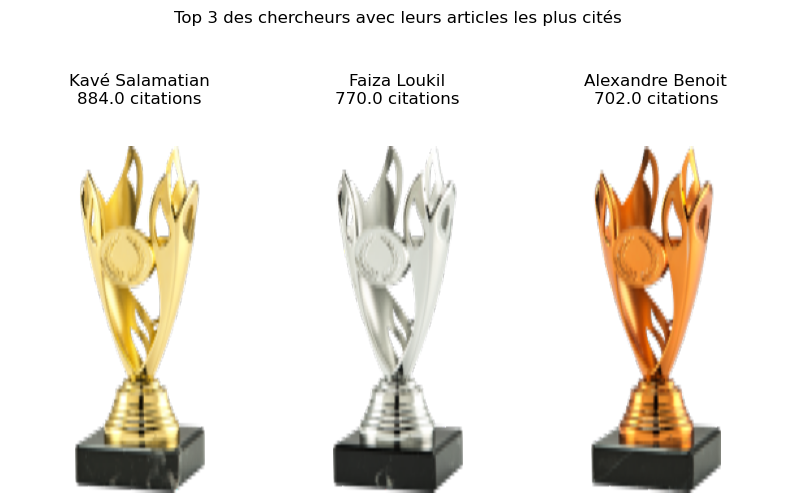

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

df = pd.read_csv("data.csv")
# Exemple de données fictives
max_citation_articles = df.loc[df.groupby('researcher')['value of cited by'].idxmax()]

# Trier les chercheurs par le nombre de citations de l'article le plus cité en ordre décroissant
max_citation_articles = max_citation_articles.sort_values(by='value of cited by', ascending=False)

# Sélectionner les 3 premiers chercheurs
top_3_researchers = max_citation_articles.head(3)

# Trier les chercheurs par nombre de citations, en ordre décroissant
sorted_data = sorted(zip(top_3_researchers['researcher'], top_3_researchers['value of cited by']), key=lambda x: x[1], reverse=True)

# Extraire les trois premiers chercheurs et leurs citations
top_3 = sorted_data[:3]

#Charger les images de trophées
trophy_gold = Image.open('gold_trophy.png')  # Remplacez par le chemin vers l'image de trophée en or
trophy_silver = Image.open('silver_trophy.png')  # Remplacez par le chemin vers l'image de trophée en argent
trophy_bronze = Image.open('bronze_trophy.png')  # Remplacez par le chemin vers l'image de trophée en bronze

# Créer un graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Ajouter les trophées et les citations pour chaque chercheur
for i, (chercheur, citations) in enumerate(top_3):
    if i == 0:
        trophy = trophy_gold
    elif i == 1:
        trophy = trophy_silver
    else:
        trophy = trophy_bronze

    # Ajuster la taille des trophées
    trophy = trophy.resize((100, 100))

    # Calculer la position pour le trophée
    ax.imshow(trophy, extent=[i-0.25, i+0.25, 0, 120], aspect='auto')  # Position du trophée

    # Afficher le nom du chercheur et les citations
    ax.text(i, 135, f'{chercheur}\n{citations} citations', ha='center', fontsize=12)

# Personnaliser le graphique
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, 160)
ax.set_title("Top 3 des chercheurs avec leurs articles les plus cités")
ax.axis('off')  # Désactiver l'axe

plt.show()


In [65]:
top_3 = sorted_data[:3]
print(top_3)

[('Kavé Salamatian', 884.0), ('Faiza Loukil', 770.0), ('Alexandre Benoit', 702.0)]


In [ ]:
import plotly.graph_objects as go

# Exemple de données pour un podium en format JSON
podium_json = [
    {"Researcher": top_3_researchers.iloc[0]['researcher'], "Count": top_3_researchers.iloc[0]['value of cited by'], "Color": "gold", "Icon": "🥇"},
    {"Researcher": top_3_researchers.iloc[1]['researcher'], "Count": top_3_researchers.iloc[1]['value of cited by'], "Color": "silver", "Icon": "🥈"},
    {"Researcher": top_3_researchers.iloc[2]['researcher'], "Count": top_3_researchers.iloc[2]['value of cited by'], "Color": "brown", "Icon": "🥉"}
]

# Trier les données pour que le 1er soit au milieu
sorted_podium = sorted(podium_json, key=lambda x: x["Count"], reverse=True)


# Créer les positions pour le podium
x_positions = [0, -1, 1]  # Gauche, Centre, Droite
y_positions = [data["Count"] for data in sorted_podium]
colors = [data["Color"] for data in sorted_podium]
countries = [data["Researcher"] for data in sorted_podium]
icons = [data["Icon"] for data in sorted_podium]

# Créer le graphique avec Plotly
fig = go.Figure()

# Ajouter les barres pour le podium
for i, (x, y, color, country, icon) in enumerate(zip(x_positions, y_positions, colors, countries, icons)):
    fig.add_trace(go.Bar(
        x=[x],
        y=[y],
        marker=dict(color=color),
        width=0.5,
        text=f"{icon} {country} ({y})",
        textposition="outside",
        name=country
    ))

# Mettre à jour la mise en page
fig.update_layout(
    title="Podium des 3 Pays les Plus Cités",
    xaxis=dict(
        showgrid=False,
        showticklabels=False
    ),
    yaxis=dict(
        showgrid=False,
        title="Nombre de Citations"
    ),
    showlegend=False,
    plot_bgcolor="white",
    margin=dict(l=50, r=50, t=50, b=50)
)

# Afficher le graphique
fig.show()